# Fase 1: Optimización de Portafolio (Markowitz)
## 1.1 Importación de Librerías y Extracción de Datos

En esta sección, importamos las librerías necesarias y descargamos los precios de cierre ajustados de las acciones seleccionadas usando la librería `yfinance`.

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
print("Librerías importadas exitosamente.")

Librerías importadas exitosamente.


## 1.2. Configuración y Descarga de Datos

Definimos los tickers (símbolos de las acciones) y el rango de fechas. Usaremos `yfinance` para descargar los precios de cierre ajustados ('Adj Close'), que son los estándar para el análisis financiero ya que incluyen dividendos y splits.

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']
start_date = '2020-01-01'
print(f"Descargando datos para: {tickers} desde {start_date}...")
data = yf.download(tickers, start=start_date)['Close']
print("¡Datos descargados exitosamente!")
data = data.rename(columns={'AAPL': 'Apple', 'MSFT': 'Microsoft', 'GOOGL': 'Google', 'AMZN': 'Amazon', 'JPM': 'JPMorgan'})

Descargando datos para: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM'] desde 2020-01-01...


C:\Users\Biade\AppData\Local\Temp\ipykernel_8736\4125008355.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date)['Close']
[*********************100%***********************]  5 of 5 completed

¡Datos descargados exitosamente!


In [ ]:
data.head()

Ticker,Apple,Amazon,Google,JPMorgan,Microsoft
Date,,,,,
2020-01-02,72.538521,94.900497,67.965233,119.573341,152.791138
2020-01-03,71.833305,93.748497,67.609688,117.995422,150.888611
2020-01-06,72.405678,95.143997,69.411758,117.901611,151.278625
2020-01-07,72.065155,95.343002,69.277679,115.897209,149.899307
2020-01-08,73.224403,94.598503,69.770782,116.801308,152.286987


## 1.3. Visualización Preliminar y Cálculo de Retornos

Antes de calcular, es una buena práctica visualizar los precios para entender su comportamiento. Luego, calcularemos los retornos diarios (`pct_change`) y eliminaremos el primer día (que será `NaN`, ya que no tiene un día anterior contra el cual compararse).

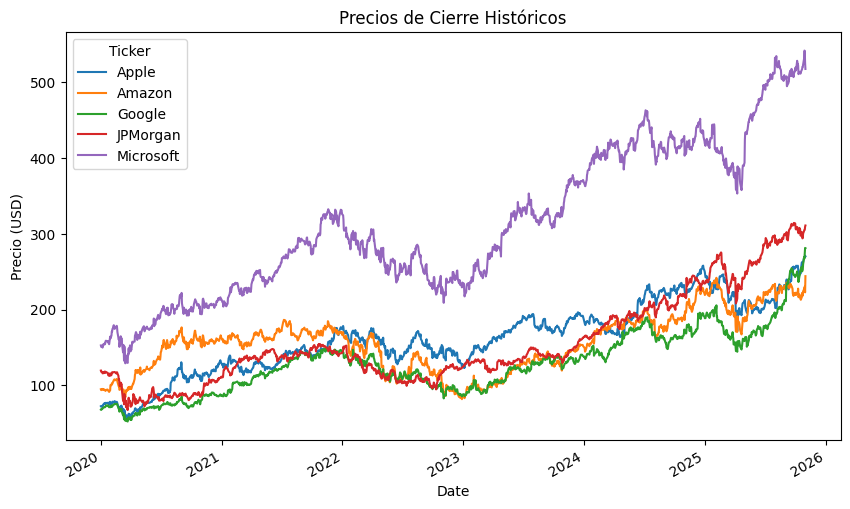

In [ ]:
data.plot(figsize=(10, 6), title='Precios de Cierre Históricos')
plt.ylabel('Precio (USD)')
plt.show()

In [ ]:
returns = data.pct_change()
print("Retornos diarios (con NaN):")
print(returns.head())
returns = returns.dropna()
print("\nRetornos diarios (limpios):")
returns.head()

Retornos diarios (con NaN):
Ticker         Apple    Amazon    Google  JPMorgan  Microsoft
Date                                                         
2020-01-02       NaN       NaN       NaN       NaN        NaN
2020-01-03 -0.009722 -0.012139 -0.005231 -0.013196  -0.012452
2020-01-06  0.007968  0.014886  0.026654 -0.000795   0.002585
2020-01-07 -0.004703  0.002092 -0.001932 -0.017001  -0.009118
2020-01-08  0.016086 -0.007809  0.007118  0.007801   0.015929

Retornos diarios (limpios):


Ticker,Apple,Amazon,Google,JPMorgan,Microsoft
Date,,,,,
2020-01-03,-0.009722,-0.012139,-0.005231,-0.013196,-0.012452
2020-01-06,0.007968,0.014886,0.026654,-0.000795,0.002585
2020-01-07,-0.004703,0.002092,-0.001932,-0.017001,-0.009118
2020-01-08,0.016086,-0.007809,0.007118,0.007801,0.015929
2020-01-09,0.021241,0.004799,0.010498,0.003651,0.012493


In [ ]:
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
print("--- Retornos Promedio Anualizados ---")
print(mean_returns)
print("\n--- Matriz de Covarianza Anualizada ---")
print(cov_matrix)

--- Retornos Promedio Anualizados ---
Ticker
Apple        0.277823
Amazon       0.226987
Google       0.297035
JPMorgan     0.214110
Microsoft    0.254193
dtype: float64

--- Matriz de Covarianza Anualizada ---
Ticker        Apple    Amazon    Google  JPMorgan  Microsoft
Ticker                                                      
Apple      0.103510  0.068292  0.065800  0.043247   0.068452
Amazon     0.068292  0.129157  0.073908  0.034112   0.071555
Google     0.065800  0.073908  0.105679  0.041940   0.069093
JPMorgan   0.043247  0.034112  0.041940  0.099705   0.040649
Microsoft  0.068452  0.071555  0.069093  0.040649   0.088707


## 1.4. Exportación de Resultados a Excel

¡Fase de Python completada! Ahora, guardaremos nuestros dos resultados clave, los retornos promedio (`mean_returns`) y la matriz de covarianza (`cov_matrix`), en un archivo de Excel. Cada uno irá a una hoja separada.

Este archivo será la base para nuestro modelo de optimización en Excel con Solver.

In [ ]:
output_filename = 'Datos_Portafolio_para_Solver.xlsx'
with pd.ExcelWriter(output_filename) as writer:
    mean_returns.to_excel(writer, sheet_name='Retornos_Promedio')
    cov_matrix.to_excel(writer, sheet_name='Matriz_Covarianza')
print(f"¡Éxito! Los datos se han guardado en el archivo: {output_filename}")
print("Puedes abrir este archivo en Excel para la siguiente fase.")

¡Éxito! Los datos se han guardado en el archivo: Datos_Portafolio_para_Solver.xlsx
Puedes abrir este archivo en Excel para la siguiente fase.
